# 가위바위보


In [1]:
# 사용할 라이브러리 버전확인
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [2]:
# 데이터 준비
# 클래스 분류된 사진 찍기
# https://teachablemachine.withgoogle.com/

# 디렉토리 만들기 
#(-p 옵션을 주어 생성하게되면 자동으로 중간단계의 디렉토리를 생성하면서 그 하위 디렉토리를 생성)
# $ mkdir -p ~/aiffel/rock_scissor_paper/scissor
# $ mkdir -p ~/aiffel/rock_scissor_paper/rock
# $ mkdir -p ~/aiffel/rock_scissor_paper/paper

# $ ls -l ~/aiffel/rock_scissor_paper

#클라우드 이미지 압축해제
#(찍은 사진이 압축파일(zip)로 저장되어있다)
# # 원하는 디렉토리로 이동 =3
# $ cd  ~/aiffel/rock_scissor_paper/rock

# # 압축 해제 명령어 : unzip <파일명>.zip
# $ unzip rock.zip

# # 가위, 보에 대해서도 똑같이 실행!
# $ cd  ~/aiffel/rock_scissor_paper/scissor
# $ unzip scissor.zip

# $ cd  ~/aiffel/rock_scissor_paper/paper
# $ unzip paper.zip



In [3]:
#받은 이미지의 크기가 "224X224"
# "28X28" 로 만들어야함 손글씨의 경우 이미지 2828이었기때문에

#라이브러리 불러오기 PIL
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [4]:
#이미지 사이즈 변환
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [5]:
# 바위와 보도 이미지 사이즈변경 28X28으로

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)


print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [6]:
# 보 이미지 사이즈 변경 28X28으로

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [7]:
# load_data() 함수로 임의의 사진 데이터 읽어오기
# 3개의 클리스 가위 :0 ,바위:1, 보:2로 라벨링

import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


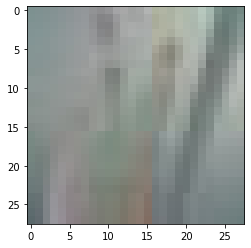

In [8]:
#이미지 불러보기
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [9]:
#딥러닝 네트워크 설계하기
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
#input_shape 입력값 RGB (28, 28, 3) 
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
#가위 바위 보 3가지로 최종 분기
print('Model에 추가된 Layer 개수: ', len(model.layers))



model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

In [10]:
# 딥러닝 네트워크 학습시키기

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 35s 24ms/step - loss: 23.8878 - accuracy: 0.3600
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 9.1852 - accuracy: 0.3700
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 5.5924 - accuracy: 0.3900
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 2.9119 - accuracy: 0.4800
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 2.1768 - accuracy: 0.5267
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1482 - accuracy: 0.6267
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.2237 - accuracy: 0.6300
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1700 - accuracy: 0.6233
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.2012 - accuracy: 0.6233
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 1.3158 - accuracy: 0.6467


In [11]:
#Test 이미지로 Test하기
#Test 이미지 data 준비

# 224X224 data 28X28 사이즈 이미지로로 만들기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [12]:
#test_accuracy 측정

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 7.3593 - accuracy: 0.3833
test_loss: 7.359309196472168 
test_accuracy: 0.38333332538604736


# 더 좋은 네트워크 만들기

- 하이퍼 파라미터 변경하여 딥러닝 네트워크 설계
- 층의 깊이와 epoch 수변경

In [13]:
#더 좋은 네트워크 만들기


#하이퍼 파라미터 변경하여 딥러닝 네트워크 설계

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
#input_shape 입력값 RGB (28, 28, 3) 
# 더다양한 입력 이미지의 특징을 살펴봄 16에서 32로 변경
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
#가위 바위 보 3가지로 최종 분기
print('Model에 추가된 Layer 개수: ', len(model.layers))



model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (

In [14]:
# 총 파라미터 35,875개 

In [15]:
# 학습 하기

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)


Epoch 1/10
10/10 [==============================] - 1s 12ms/step - loss: 7.5967 - accuracy: 0.3167
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 2.0153 - accuracy: 0.3900
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5104 - accuracy: 0.4533
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.2330 - accuracy: 0.4800
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8424 - accuracy: 0.6467
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6144 - accuracy: 0.7467
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.8600
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.8433
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8833
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.9167


In [16]:
#test_accuracy 측정

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 4.2958 - accuracy: 0.4267
test_loss: 4.295751094818115 
test_accuracy: 0.4266666769981384


In [17]:
#더 좋은 네트워크 만들기


#하이퍼 파라미터 변경하여 딥러닝 네트워크 설계 (16, 16)으로 변경

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
#input_shape 입력값 RGB (28, 28, 3) 
# 더다양한 입력 이미지의 특징을 살펴봄 16에서 32로 변경
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
#가위 바위 보 3가지로 최종 분기
print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

# 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

#test_accuracy 측정

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                12832     
_________________________________________________________________
dense_5 (Dense)              (

In [18]:
# 하이퍼파라미터(16.32) 에서 epoch 수 조정

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
#input_shape 입력값 RGB (28, 28, 3) 
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
#가위 바위 보 3가지로 최종 분기
print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

# 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

#test_accuracy 측정

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")


Model에 추가된 Layer 개수:  7
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_7 (Dense)              (

In [19]:
# 16, 32, 32 (Conv2D, Conv2D, Dense) 변경

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
#input_shape 입력값 RGB (28, 28, 3) 
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
#가위 바위 보 3가지로 최종 분기
print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

# 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

#test_accuracy 측정

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")


Model에 추가된 Layer 개수:  7
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_9 (Dense)              (

### 층의 깊이를 조절하는 것만으로는 accuracy를 높이는데 한계가 있어 보인다

In [20]:
# 커널 크기 변경 9X9

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (9,9), activation='relu', input_shape=(28,28,3)))
#input_shape 입력값 RGB (28, 28, 3) 
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
#가위 바위 보 3가지로 최종 분기
print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

# 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

#test_accuracy 측정

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")


Model에 추가된 Layer 개수:  7
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 20, 20, 16)        3904      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 32)          12832     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                9248      
_________________________________________________________________
dense_11 (Dense)             (

In [21]:
# 커널 크기 변경  5X5
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (5,5), activation='relu', input_shape=(28,28,3)))

model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

# 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

#test_accuracy 측정

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model에 추가된 Layer 개수:  7
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 16)        1216      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                8208      
_________________________________________________________________
dense_13 (Dense)             (

In [22]:
# 커널 크기변경 7X7

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (7,7), activation='relu', input_shape=(28,28,3)))

model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

# 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

#test_accuracy 측정

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model에 추가된 Layer 개수:  7
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 22, 22, 16)        2368      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 32)          4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                8208      
_________________________________________________________________
dense_15 (Dense)             (

###  kernel의 크기 증가
- kernel의 크기가(3X3) 너무 작아 유의미한 feature를 잡아내지 못할 수 있음
- (5X5)...(9X9)까지 늘려 시험해 보았으나 테스트 정확도에서 유의미한 차이는 보이지 않았다

### 학습 Epoch 횟수를 늘려 학습
- 일정 횟수(위에서는30)를 넘어가면 학습데이터에 과적합(over-fitted)되어 오히려 test 데이터에 대하여 accracy가 떨어지는 경향을 나타내는 것으로 보임.
- 학습 자료의 양 자체가 작고, 
- 뽑아낼 유의미한 feature의 수가 적은 것으로 판단

### kernel의 크기와 Epoch 수를 조절 하여 결과를 확인해 보았으나, 유의미한 accuracy의 변화는 보이지 않았다.

### 제공된 이미지 원본 데이터를 확인
- 데이터 자체가 육안으로 보았을 때도 굉장히 불분명하고 질(해상도)이 좋지 않음
- 직접 사진을 찍은 가위, 바위 보 손모양 사진을 가지고 진행시도(가위,바위,보 각각 700장씩 2100장)
- 기존의 제공된 데이터셋의 수(300)가 적어서 다양한 feature뽑아 내고, 효과적으로 구분할 수 있는 학습이 되지 않았을 것 같은 점도 고려
- 데이터셋의 사진 수를 7배 늘려 학습을 진행.
- 데이터의 over-fitting 을 극복하기 위해 다양한 모양과 위치의 손 사진과 7명의 각기다른 사람의 손 사진을 사용

In [23]:
# 직접 찍은 데이터 불러오기

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 28X28 사이즈로 변환
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/N_data/scissors"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/N_data/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/N_data/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

700  images to be resized.
700  images resized.
가위 이미지 resize 완료!
700  images to be resized.
700  images resized.
바위 이미지 resize 완료!
700  images to be resized.
700  images resized.
보 이미지 resize 완료!


In [24]:
# 각 가위, 바위, 보 에 0,1,2 label을 붙여 load_data로 불러오기

def load_data(img_path, number_of_data=2100):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/N_data"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2100 입니다.
x_train shape: (2100, 28, 28, 3)
y_train shape: (2100,)


라벨:  0


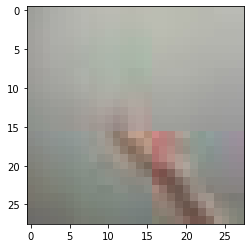

In [25]:
# 이미지 확인

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [26]:
#모델 설계및 학습
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Model에 추가된 Layer 개수:  7
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_17 (Dense)             (

In [27]:
# 학습 accuracy 가 0.6538 매우 떨어져 학습 하이퍼 파리미터 조정

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (7,7), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50)

Model에 추가된 Layer 개수:  7
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 22, 22, 16)        2368      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 5, 5, 32)          25120     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_19 (Dense)             (

In [28]:
# 학습 accuracy 0.86
# kernel 7X7로 설정 
# 이미지크기 28X28 에서 손모양이 차지하는 공간이 약 10X10 내부에 들어 가는 것으로 보임
# 하위 epoch 에서 accuracy가  steady-state에 도달 되는 것으로 보아 50이면 충분
# 뽑아낼 feature 수와 분류 알고리즘 복잡도 조정
# 위 모델으로 test에 test_accuracy 확인

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

# test_accuracy 0.48

10/10 - 0s - loss: 2.5956 - accuracy: 0.4867
test_loss: 2.5956060886383057 
test_accuracy: 0.4866666793823242


In [29]:
# 하이퍼 파라미터 변경 (32, 32, 16) 커널 7X7 epoch= 50
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (7,7), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")



Model에 추가된 Layer 개수:  7
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 22, 22, 32)        4736      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 5, 5, 32)          50208     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_21 (Dense)             

In [30]:
# 하이퍼 파라미터 변경 (8, 16, 16) 커널 9X9 epoch= 50
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(8, (9,9), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(16, (9,9), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model에 추가된 Layer 개수:  7
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 20, 20, 8)         1952      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 10, 10, 8)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 2, 2, 16)          10384     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             

In [31]:
# 하이퍼 파라미터 변경 (16, 32, 64) 커널 7X7 epoch= 50
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (7,7), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model에 추가된 Layer 개수:  7
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 22, 22, 16)        2368      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 5, 5, 32)          25120     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             

In [32]:
# 하이퍼 파라미터 변경 (16, 32, 64) 커널 7X7 epoch= 50
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (7,7), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model에 추가된 Layer 개수:  7
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 22, 22, 16)        2368      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 5, 5, 32)          25120     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             

### 데이터 셋의 양을 증가 시켜 학습했지만, 오히려 제공된 test sample 에 대한 accuracy 가 떨어졌다.
- 범용적인 가위바위보 이미지 분류(직접찍은 사진을 추가하여 제공된 test sample을 분류/ 일반적인 불특정 다수의 손모양에 대한 가위바위보 분류)에 대한 모델 학습이 이루어 지지 않았다. (원하는 정도의 accuray 달성 못함)
- 제공된 train과 test 샘플의 intrinsic representation 을 뽑아내기위한 공통의 feature가 직접찍은 손이미지 데이터 2100장에는 부족한 것으로 생각된다. 
- 추후 더 많고 다양한 이미지로 부터 학습을 하면 모델의 분류 성능을 높일 수도 있지 않을까 생각된다.
- 2100장의 데이터셋자체중 일부(20%)를 test셋으로 설정, 2100장의 이미지를 train과 test로 나누어 데이터 모집단 안에서 accuracy 측정
- (일종의 validation 느낌)
- 데이터의 over-fitting 을 극복하기 위해 정규화를 수행

In [33]:
# sklearn 의 트레인 테스트 스플릿 모듈을 이용해 데이터 셋 분리
# 대문자 X Y 로 할당

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=17 )

In [34]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=50, validation_split=0.2) #train 내에서 validation 0.2잡아서 수행

test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model에 추가된 Layer 개수:  7
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 32)          25120     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                18496     
_________________________________________________________________
dense_29 (Dense)             

Epoch 50/50
42/42 [==============================] - 0s 3ms/step - loss: 0.2542 - accuracy: 0.9092 - val_loss: 0.7901 - val_accuracy: 0.7054
14/14 - 0s - loss: 0.8139 - accuracy: 0.7571
test_loss: 0.8138782382011414 
test_accuracy: 0.7571428418159485


In [35]:
# loss: 0.2542 - accuracy: 0.9092 - val_loss: 0.7901 - val_accuracy: 0.7054
# test_loss: 0.8138782382011414 test_accuracy: 0.7571428418159485

In [36]:
# over-fitting 방지하기위해 정규화
X_train_norm = X_train/255.0   # 입력은 0~1 사이의 값으로 정규화
X_test_norm = X_test/255.0

In [37]:
# 정규화한 X
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_norm, Y_train, epochs=50, validation_split=0.2) #train 내에서 validation 0.2잡아서 수행

test_loss, test_accuracy = model.evaluate(X_test_norm, Y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

#test_loss: 0.5161685347557068 test_accuracy: 0.7976190447807312

Model에 추가된 Layer 개수:  7
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 7, 7, 32)          25120     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                18496     
_________________________________________________________________
dense_31 (Dense)             

Epoch 50/50
42/42 [==============================] - 0s 4ms/step - loss: 0.3491 - accuracy: 0.8862 - val_loss: 0.5039 - val_accuracy: 0.7768
14/14 - 0s - loss: 0.5162 - accuracy: 0.7976
test_loss: 0.5161685347557068 
test_accuracy: 0.7976190447807312


In [38]:
# 정규화 하지 않은 X  trial 2
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=50, validation_split=0.2) #train 내에서 validation 0.2잡아서 수행

test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

#test_loss: 0.8552475571632385 test_accuracy: 0.738095223903656

Model에 추가된 Layer 개수:  7
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 7, 7, 32)          25120     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                18496     
_________________________________________________________________
dense_33 (Dense)             

Epoch 50/50
42/42 [==============================] - 0s 3ms/step - loss: 0.4187 - accuracy: 0.8274 - val_loss: 0.8862 - val_accuracy: 0.7113
14/14 - 0s - loss: 0.8552 - accuracy: 0.7381
test_loss: 0.8552475571632385 
test_accuracy: 0.738095223903656


In [39]:
# 정규화한 X 모델링과 테스트 trial 2
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_norm, Y_train, epochs=50, validation_split=0.2) #train 내에서 validation 0.2잡아서 수행

test_loss, test_accuracy = model.evaluate(X_test_norm, Y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")
#test_loss: 0.4975040555000305 test_accuracy: 0.8452380895614624

Model에 추가된 Layer 개수:  7
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 7, 7, 32)          25120     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)                18496     
_________________________________________________________________
dense_35 (Dense)             

Epoch 50/50
42/42 [==============================] - 0s 3ms/step - loss: 0.2393 - accuracy: 0.9189 - val_loss: 0.4591 - val_accuracy: 0.8036
14/14 - 0s - loss: 0.4975 - accuracy: 0.8452
test_loss: 0.4975040555000305 
test_accuracy: 0.8452380895614624


In [40]:
# 정규화한 X 모델링과 테스트 trial 3
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(X_train_norm, Y_train, epochs=50, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test_norm, Y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")


Model에 추가된 Layer 개수:  7
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 32)          25120     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                18496     
_________________________________________________________________
dense_37 (Dense)             

Epoch 50/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1196 - accuracy: 0.9591 - val_loss: 0.4369 - val_accuracy: 0.8333
14/14 - 0s - loss: 0.3968 - accuracy: 0.8571
test_loss: 0.39684033393859863 
test_accuracy: 0.8571428656578064


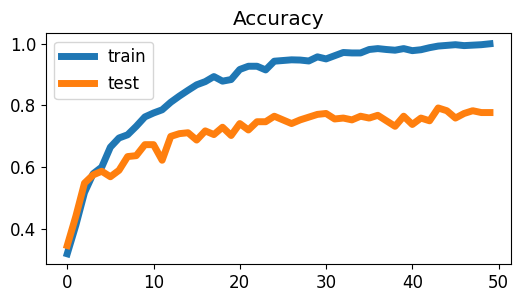

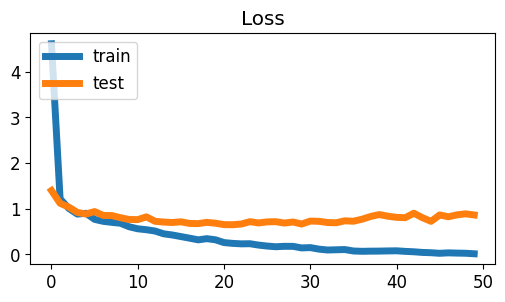

In [59]:
# 정규화한 데이터의 epoch 횟수에따른  train test 의 accuracy 와 loss
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [56]:
# 정규화하지 않은 X 모델링과 테스트 trial 3
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=50, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

#test_loss: 0.71726393699646 test_accuracy: 0.7952380776405334

Model에 추가된 Layer 개수:  7
Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_244 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_244 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_245 (Conv2D)          (None, 7, 7, 32)          25120     
_________________________________________________________________
max_pooling2d_245 (MaxPoolin (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_122 (Flatten)        (None, 288)               0         
_________________________________________________________________
dense_244 (Dense)            (None, 64)                18496     
_________________________________________________________________
dense_245 (Dense)           

Epoch 50/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.8648 - val_accuracy: 0.7768
14/14 - 0s - loss: 0.7665 - accuracy: 0.8095
test_loss: 0.7665392160415649 
test_accuracy: 0.8095238208770752


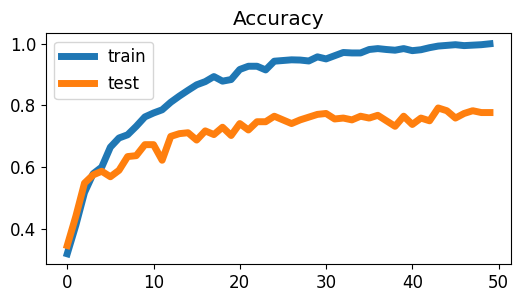

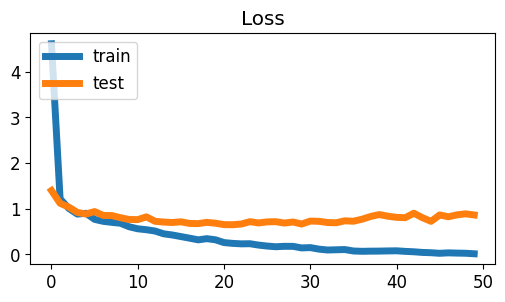

In [58]:
# 정규화하지 않은 모델링 시각화
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [44]:
# 정규화 하였을때 over-fitting 이 줄어드는 것을 알수 있었다. (원인 discussion 필요)

In [45]:
# 정규화한 X 모델링과 테스트 trial 4
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(X_train_norm, Y_train, epochs=50, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test_norm, Y_test, verbose=0)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

#test_loss: 0.414274662733078 test_accuracy: 0.8333333134651184

Model에 추가된 Layer 개수:  7
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7, 32)          25120     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                18496     
_________________________________________________________________
dense_41 (Dense)             

Epoch 50/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1584 - accuracy: 0.9435 - val_loss: 0.4603 - val_accuracy: 0.8304
test_loss: 0.414274662733078 
test_accuracy: 0.8333333134651184


In [46]:
# test 를 n번 독립시행할때, n 이 충분히 크면 test_accuracy값의 분포는 정규 분포를 따를 것이다.
# test_accuracy 가 0.6 이상인 확률을 구해 보자.
# 한번의 시행에서 0.6 이상의 test_accuracy가 나왔다고 하여 이모델이 항상 0.6을 넘는다고 생각할 수는 없다

In [47]:
# 정규화한 X 모델링과 테스트 trial 5
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(X_train_norm, Y_train, epochs=50, validation_split=0.2, verbose=0)

test_loss, test_accuracy = model.evaluate(X_test_norm, Y_test, verbose=0)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")



Model에 추가된 Layer 개수:  7
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 7, 7, 32)          25120     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                18496     
_________________________________________________________________
dense_43 (Dense)             

In [48]:
# 정규화한 X 모델링과 테스트 trial n =100
test_accuracy_list = [] # test_accuracy_list 에 test_accuracy 값 취합
for i in range(100):
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(32, (7,7), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))


    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    hist = model.fit(X_train_norm, Y_train, epochs=50, validation_split=0.2, verbose=0)

    test_loss, test_accuracy = model.evaluate(X_test_norm, Y_test, verbose=0)

    test_accuracy_list.append(test_accuracy)


In [49]:
test_accuracy_list

[0.8547618985176086,
 0.8642857074737549,
 0.8190476298332214,
 0.7976190447807312,
 0.8333333134651184,
 0.9023809432983398,
 0.800000011920929,
 0.776190459728241,
 0.8523809313774109,
 0.7595238089561462,
 0.7976190447807312,
 0.6333333253860474,
 0.8238095045089722,
 0.8214285969734192,
 0.8547618985176086,
 0.7333333492279053,
 0.8309524059295654,
 0.711904764175415,
 0.7928571701049805,
 0.8142856955528259,
 0.7690476179122925,
 0.8285714387893677,
 0.726190447807312,
 0.8214285969734192,
 0.811904788017273,
 0.8071428537368774,
 0.7904762029647827,
 0.7857142686843872,
 0.8476190567016602,
 0.7833333611488342,
 0.8357142806053162,
 0.8190476298332214,
 0.8476190567016602,
 0.8214285969734192,
 0.8309524059295654,
 0.8571428656578064,
 0.8642857074737549,
 0.8309524059295654,
 0.8023809790611267,
 0.8380952477455139,
 0.8738095164299011,
 0.8285714387893677,
 0.7809523940086365,
 0.8238095045089722,
 0.8857142925262451,
 0.8595238327980042,
 0.8523809313774109,
 0.816666662693023

In [50]:
# 평균과 표준편차
import numpy as np
print(np.mean(test_accuracy_list), np.std(test_accuracy_list))

0.8173095244169235 0.04529302112419902


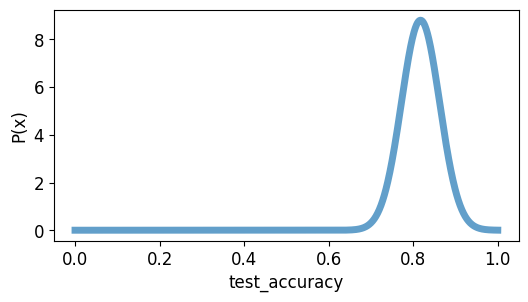

In [60]:
# 독립시행의 확률밀도함수가 정규 분포를 따른다고 가정하였을 때, n=100 n 이 충분히 크므로
# 모델의 test_accuracy의 확률 밀도 함수
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 5

mu1, sigma1 = 0.8173095244169235, 0.04529302112419902

x = np.linspace(0, 1, 1000)
y1 = (1 / np.sqrt(2 * np.pi * sigma1**2)) * np.exp(-(x-mu1)**2 / (2 * sigma1**2))

plt.plot(x, y1, alpha=0.7)

plt.xlabel('test_accuracy')
plt.ylabel('P(x)')

plt.show()

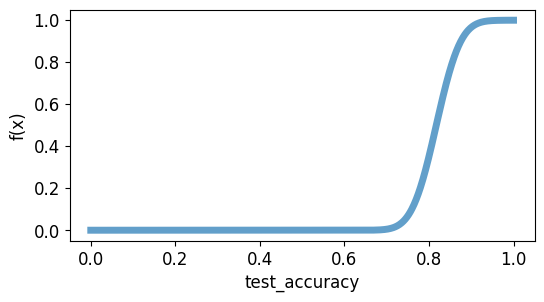

In [61]:
# 모델의 test_accuracy의 누적 분포함수
from scipy.special import erf

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 5

mu1, sigma1 = 0.8173095244169235, 0.04529302112419902

x = np.linspace(0, 1, 1000)
y_cum = 0.5 * (1 + erf((x - mu1)/(np.sqrt(2 * sigma1**2))))

plt.plot(x, y_cum, alpha=0.7)

plt.xlabel('test_accuracy')
plt.ylabel('f(x)')

plt.show()


In [62]:
import scipy.stats

# 평균 = 0.8173095244169235, 표준편차 = 0.04529302112419902 정규분포 객체 정의
norm_dist = scipy.stats.norm(loc = 0.8173095244169235, scale = 0.04529302112419902)

In [63]:
# x = 0.6까지의 누적분포함수 값 탐색
norm_dist.cdf(0.6) 

8.018534242910452e-07

In [64]:
# x > 0.6 확률
1-norm_dist.cdf(0.6) # 약 99.999% 확률로 위 모델의 test_accuracy는 60%(0.6) 보다 큰값을 나타낸다.

0.9999991981465757